# Recognize Cats by TensorFlow

## Download Picture From Data

In [19]:
from skimage import data

In [20]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

We use Pickle to open a file containing a dictionary 

In [21]:
import pickle 

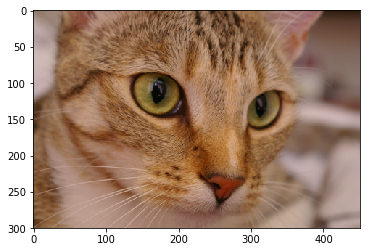

In [22]:
image=data.chelsea()
plt.imshow(image)

## To use TensorFlow, we should convert the shape of the aforementioned picture to TensorFlow shape

In [23]:
np.shape(image)

(300, 451, 3)

## We should convert (Height, Width, # Channels) to (# Pictures, Height, Width, # Channels)
### Here the number is denoted by # sign

In [24]:
se=tf.Session()
image1=se.run(tf.reshape(image, [1,300,451,3]))

In [25]:
np.shape(image1)

(1, 300, 451, 3)

## Here we apply a filter (vertical) to picture to see the result

In [26]:
w=se.run(tf.constant([[1,0,-1]]*9))
w

array([[ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1]], dtype=int32)

## We reshape the aforementioned matrix to a  $3*3*3$ matrix (cube). Note that the shape of filter is (Height, Width, # Channels, # Pictures)

In [27]:
w=se.run(tf.reshape(w,[3,3,3,1]))
w

array([[[[ 1],
         [ 0],
         [-1]],

        [[ 1],
         [ 0],
         [-1]],

        [[ 1],
         [ 0],
         [-1]]],


       [[[ 1],
         [ 0],
         [-1]],

        [[ 1],
         [ 0],
         [-1]],

        [[ 1],
         [ 0],
         [-1]]],


       [[[ 1],
         [ 0],
         [-1]],

        [[ 1],
         [ 0],
         [-1]],

        [[ 1],
         [ 0],
         [-1]]]], dtype=int32)

## Now, we apply the filter on Picture:
The option "VALID" in padding decreases the size of picture, while the option "SAME" does not effect the size.
Also, we use the option strides to move the filter

In [28]:
# Note that w=se.run(tf.reshape(w,[3,3,3,1]))
conv=se.run(tf.nn.conv2d(tf.cast(image1,tf.float16),w,padding="VALID", strides=[1,3,3,1]))

In [29]:
np.shape(conv)

(1, 100, 150, 1)

## We should convert the shape of picture to depict the picture

In [30]:
conv1=se.run(tf.cast(tf.reshape(conv, [100,150]), tf.int16))

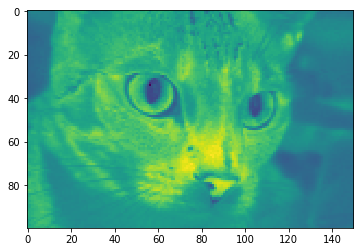

In [31]:
plt.imshow(conv1)

## Here we apply a filter (horizontal) to picture to see the result

In [32]:
w=se.run(tf.constant([[1,1,1],[0,0,0],[-1,-1,-1]]*3))
w

array([[ 1,  1,  1],
       [ 0,  0,  0],
       [-1, -1, -1],
       [ 1,  1,  1],
       [ 0,  0,  0],
       [-1, -1, -1],
       [ 1,  1,  1],
       [ 0,  0,  0],
       [-1, -1, -1]], dtype=int32)

In [33]:
w=se.run(tf.reshape(w,[3,3,3,1]))
w[0][0]

array([[1],
       [1],
       [1]], dtype=int32)

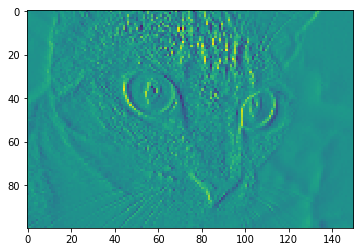

In [34]:
# Note that w=se.run(tf.reshape(w,[3,3,3,1]))
conv=se.run(tf.nn.conv2d(tf.cast(image1,tf.float16),w,padding="VALID", strides=[1,3,3,1]))
np.shape(conv)
conv1=se.run(tf.cast(tf.reshape(conv, [100,150]), tf.int16))
plt.imshow(conv1)

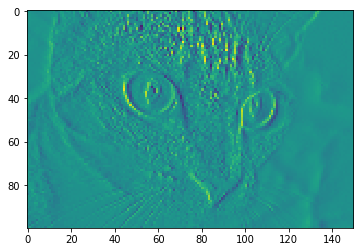

In [35]:
w=se.run(tf.constant([[3,10,3],[0,0,0],[-3,-10,-3]]*3))
w=se.run(tf.reshape(w,[3,3,3,1]))
# Note that w=se.run(tf.reshape(w,[3,3,3,1]))
conv=se.run(tf.nn.conv2d(tf.cast(image1,tf.float16),w,padding="VALID", strides=[1,3,3,1]))
np.shape(conv)
conv1=se.run(tf.cast(tf.reshape(conv, [100,150]), tf.int16))
plt.imshow(conv1)

# Now, we apply mqx pooling on picture

In [39]:
mp=se.run(tf.nn.max_pool(image1, ksize=[1,2,2,1], padding="SAME", strides=[1,2,2,1]))
np.shape(mp)

(1, 150, 226, 3)

## Since the last value (the number of Channels) is 3, there is no reason to reshape to depict the picture. In the following code, we use $mp[0]$ to discard the first value of shape to obtain the real matrix of shape

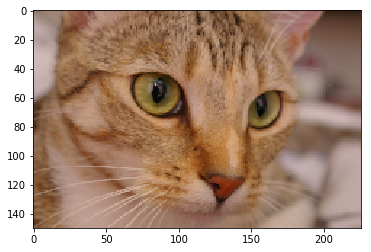

In [41]:
plt.imshow(mp[0])

## We write a function to convert a pickle file to dictionary 

In [65]:
def unpickle(address, filename):
    with open(os.path.join(address, filename), 'rb') as f:
        a=pickle.load(f,encoding="bytes")
    return a

In [66]:
df=unpickle("/Users/hhhaji/Desktop/P", "data_batch_1")

In [67]:
df.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [68]:
data1=df[ b'data']

In [71]:
np.shape(data1)

(10000, 3072)

## The aforementioned output shows that we have 10000 pictures that each one was recorded in a vector of length 3072 where $3072=32*32*3$

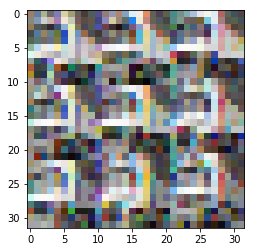

In [72]:
# We use -1 in the following code when we are not aware about the number of pictures
data11=se.run(tf.reshape(data1, [-1, 32, 32, 3]))
plt.imshow(data11[1])

## There is problem about the aforementioned pictures since they have been saved with the format (Number, Channel, Height, Width) so we should reformat the pictures as follows

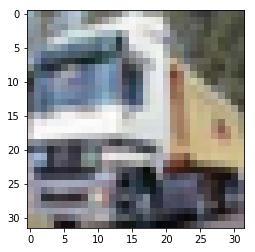

In [78]:
df_1=se.run(tf.reshape(data1, [-1, 3, 32, 32]))
# The vectore [0,2,3,1] reformat the picture as (Number, Height, Width, Channel)
df_1=se.run(tf.transpose(df_1,[0,2,3,1]))
plt.imshow(df_1[1])